In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

pd.set_option('display.max_colwidth', 30)


In [3]:
# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
        
print("Path to dataset files:", path)

Path to dataset files: C:\Users\wu_li\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [4]:
books = pd.read_csv(f"{path}/books.csv")

In [5]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/bo...,A NOVEL THAT READERS and c...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Chr...,Detective and mystery stories,http://books.google.com/bo...,A new 'Christie for Christ...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/bo...,Volume Two of Stephen Dona...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/bo...,"A memorable, mesmerizing h...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/bo...,Lewis' work on the nature ...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatt...,Sri Nisargadatta Maharaj;S...,Philosophy,http://books.google.com/bo...,This collection of the tim...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/bo...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/bo...,Since the three volume edi...,1981.0,0.00,210.0,0.0


In [6]:
books.dtypes

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object

In [7]:
print("Descriptive Statistics (Numerical): ")
books.describe()

Descriptive Statistics (Numerical): 


,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [8]:
print("Descriptive Statistics (Categorical): ")
books.describe(include=['object'])

Descriptive Statistics (Categorical): 


,isbn10,title,subtitle,authors,categories,thumbnail,description
count,6810,6810,2381,6738,6711,6481,6548
unique,6810,6398,2009,3780,567,6481,6474
top,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/bo...,This is a reproduction of ...
freq,1,11,226,37,2588,1,6


In [9]:
print("Missing values: ")
books.isna().sum()

Missing values: 


isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [10]:
books.shape

(6810, 12)

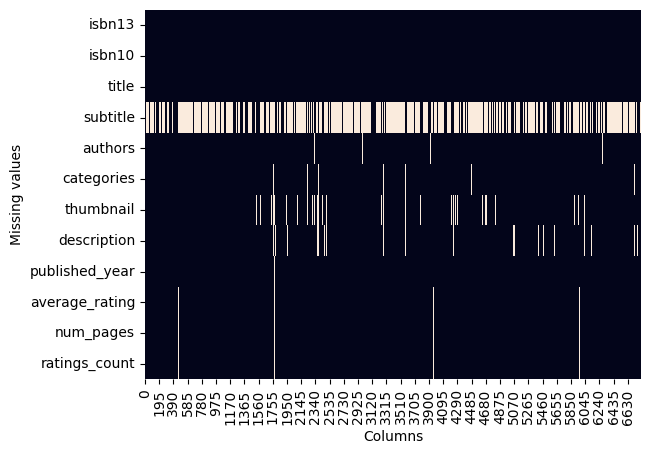

In [11]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.show()

In [12]:
books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2024 - books["published_year"]


In [13]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/bo...,A NOVEL THAT READERS and c...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Chr...,Detective and mystery stories,http://books.google.com/bo...,A new 'Christie for Christ...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/bo...,Volume Two of Stephen Dona...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/bo...,"A memorable, mesmerizing h...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/bo...,Lewis' work on the nature ...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatt...,Sri Nisargadatta Maharaj;S...,Philosophy,http://books.google.com/bo...,This collection of the tim...,1999.0,4.51,531.0,104.0,0,25.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/bo...,NaN,1993.0,4.08,74.0,324.0,1,31.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,20.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/bo...,Since the three volume edi...,1981.0,0.00,210.0,0.0,0,43.0


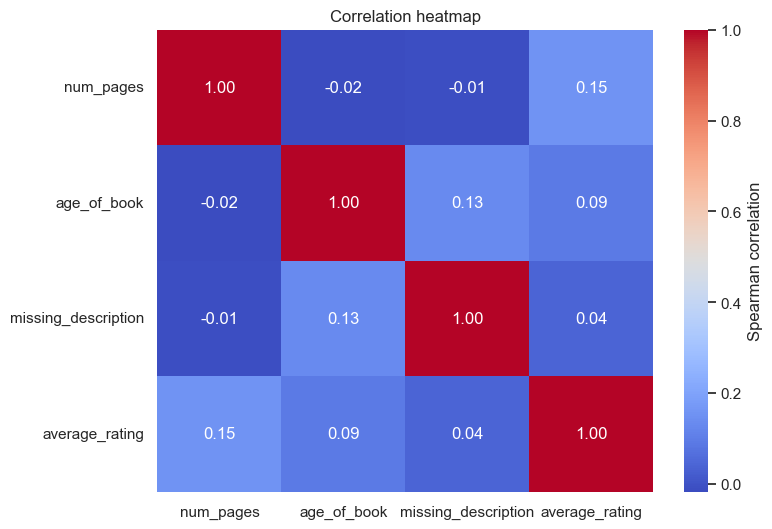

In [14]:
columns_of_interest = ['num_pages', "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label":"Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()


In [15]:
books[(books["description"].isna()) |
      (books["num_pages"].isna()) |
      (books["average_rating"].isna()) |
      (books["published_year"].isna())
    ]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet...,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/bo...,NaN,2000.0,4.10,159.0,446.0,1,24.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/bo...,NaN,2002.0,4.14,186.0,56781.0,1,22.0
99,9780020442806,0020442807,The Chronicles of Narnia: ...,NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,46.0
102,9780023513206,0023513209,Reason in History,A General Introduction to ...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/bo...,NaN,1953.0,3.64,95.0,430.0,1,71.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/bo...,NaN,2002.0,3.80,256.0,155.0,1,22.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis...,NaN,Shiro Kobayashi;Helmut Rit...,Science,http://books.google.com/bo...,NaN,2006.0,0.00,254.0,0.0,1,18.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/bo...,Presents the adventures of...,2007.0,NaN,NaN,NaN,0,17.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/bo...,NaN,1993.0,4.08,74.0,324.0,1,31.0


In [16]:
# since less than 5%, we can remove them 

books_w_desc = books[~(books["description"].isna()) & 
      ~ (books["num_pages"].isna()) &
      ~ (books["average_rating"].isna()) &
      ~ (books["published_year"].isna()) 
    ]

In [17]:
books_w_desc

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/bo...,A NOVEL THAT READERS and c...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Chr...,Detective and mystery stories,http://books.google.com/bo...,A new 'Christie for Christ...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/bo...,Volume Two of Stephen Dona...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/bo...,"A memorable, mesmerizing h...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/bo...,Lewis' work on the nature ...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/bo...,This book tells the tale o...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferr...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/bo...,Wisdom to Create a Life of...,2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatt...,Sri Nisargadatta Maharaj;S...,Philosophy,http://books.google.com/bo...,This collection of the tim...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/bo...,Since the three volume edi...,1981.0,0.00,210.0,0.0,0,43.0


In [18]:
books_w_desc.isna().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
age_of_book               0
dtype: int64

In [19]:
books_w_desc.describe(include=["object"])

,isbn10,title,subtitle,authors,categories,thumbnail,description
count,6507,6507,2281,6444,6474,6293,6507
unique,6507,6133,1915,3629,531,6293,6434
top,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/bo...,No Marketing Blurb
freq,1,10,225,37,2523,1,6


In [20]:
books_w_desc["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [21]:
books_w_desc.loc[:, "words_in_description"] = books_w_desc["description"].str.split().str.len()

C:\Users\wu_li\AppData\Local\Temp\ipykernel_16416\861775180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_w_desc.loc[:, "words_in_description"] = books_w_desc["description"].str.split().str.len()


In [22]:
books_w_desc["words_in_description"].sort_values(ascending=False)

4144    920
4091    621
6700    619
1848    575
5600    512
       ... 
5599      1
5015      1
1981      1
3364      1
2946      1
Name: words_in_description, Length: 6507, dtype: int64

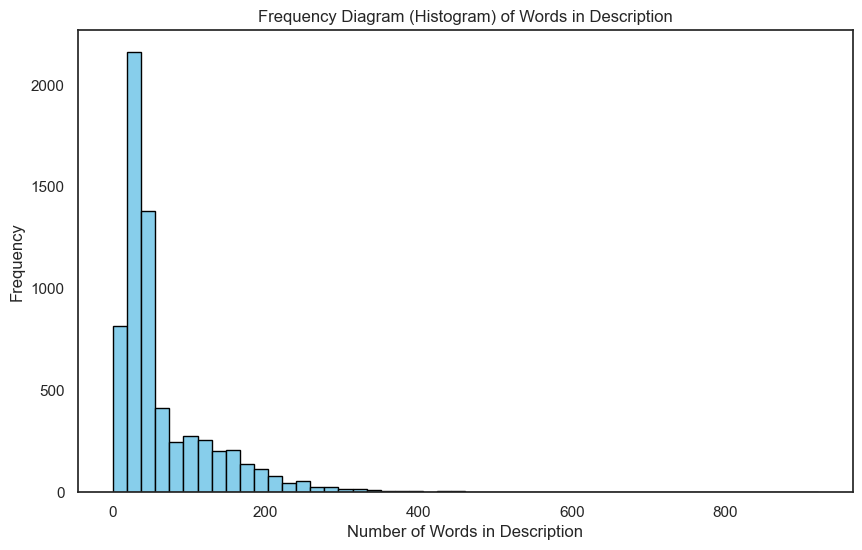

In [23]:
plt.figure(figsize=(10, 6))

# Plot histogram for 'words_in_description'
plt.hist(books_w_desc["words_in_description"], bins=50, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Words in Description')
plt.ylabel('Frequency')
plt.title('Frequency Diagram (Histogram) of Words in Description')

# Display the plot
plt.show()


In [24]:
books_w_desc.loc[books_w_desc["words_in_description"].between(1, 4), "description"] 

6                           Donation.
11                     Fantasy-roman.
748     Includes bibliographical r...
770             Bound For Oregon (PB)
775                No Marketing Blurb
812                No Marketing Blurb
857          First published in 1813.
944         Edited by Maurice Hindle.
953        DEFOE/ROBINSON CRUSOE (BC)
954             Edited by John Carey.
962         ALLEN/GETTING THINGS DONE
1054            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial,...
1060    STEINBECK/GRAPES OF WRATH ...
1346                   Fantasy-roman.
1546                      Winter 2003
1610                      Winter 1999
1813             National bestseller.
1981                         Romance.
2089               Oprah's Book Club.
2372       KANDEL/IN SEARCH OF MEMORY
2946           FICTION-ROMANCE/GOTHIC
3064               No Marketing Blurb
3364                   Fantasy-roman.
3425               A novel of Israel.
3435                 Science fiction.
3611        

In [25]:
pd.set_option('display.max_colwidth', None)
books_w_desc.loc[books_w_desc["words_in_description"].between(5, 14), "description"] 

2       Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
38                                     Koko is Peter Straub's foray into the psychological horror of the Vietnam War.
70                                                             A matter of life and death - and the Throne of England
77                                                                                     Nonsense rhyming story. 4 yrs+
84                                                  A study guide for the novel There's a Boy in the Girl's bathroom.
                                                            ...                                                      
6715                         The first comprehensive guide to addressing Native American issues in teaching children.
6726                                                                   Presents two complete novels from Henry James.
6757                                                    

In [26]:
pd.set_option('display.max_colwidth', 25)

In [27]:
pd.set_option('display.max_colwidth', None)
books_w_desc.loc[books_w_desc["words_in_description"].between(15, 24), "description"] 

10                                                          One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
32                                                                                Tells the story of three generations of Chinese women, beginning at the turn of the century.
36                                 A magical and fantastic collection of early stories by one of the most original children's authors of the 20th century. For 8-11 year olds.
57                                                          A young drifter finds more than he bargained for when he agrees to deliver a parcel to an English country house...
68                                        A new 'The Doors of Perception' for the 21st century? A visionary journey from cynicism to shamanism by a brilliant young US writer.
                                                                                         ...                                 

In [28]:
pd.set_option('display.max_colwidth', None)
books_w_desc.loc[books_w_desc["words_in_description"].between(15, 34), "description"] 

9                                 Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
10                                                                                            One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
14                           Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.
20         It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.
21      Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the

In [29]:
pd.set_option('display.max_colwidth', 25)

In [30]:
books_w_desc_25_words = books_w_desc[books_w_desc["words_in_description"] >= 25]

In [31]:
books_w_desc_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.c...,A NOVEL THAT READERS ...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agath...,Detective and mystery...,http://books.google.c...,A new 'Christie for C...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.c...,"A memorable, mesmeriz...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.c...,Lewis' work on the na...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.c...,"""In The Problem of Pa...",2002.0,4.09,176.0,37569.0,0,22.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.c...,On A Train Journey Ho...,2003.0,2.93,324.0,0.0,0,21.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.c...,This book tells the t...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His...,NaN,Robin Sharma,Health & Fitness,http://books.google.c...,Wisdom to Create a Li...,2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisarg...,Sri Nisargadatta Maha...,Philosophy,http://books.google.c...,This collection of th...,1999.0,4.51,531.0,104.0,0,25.0,174


In [32]:
# add a new column to combine title and subtitle(if subtitle exists)
# if subtitle not exist, just use the title

books_w_desc_25_words.loc[:, "title_and_subtitle"] = (
    np.where(books_w_desc_25_words["subtitle"].isna(), books_w_desc_25_words["title"],
             books_w_desc_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

C:\Users\wu_li\AppData\Local\Temp\ipykernel_16416\2760778803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_w_desc_25_words.loc[:, "title_and_subtitle"] = (


In [33]:
books_w_desc_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.c...,A NOVEL THAT READERS ...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agath...,Detective and mystery...,http://books.google.c...,A new 'Christie for C...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.c...,"A memorable, mesmeriz...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.c...,Lewis' work on the na...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.c...,"""In The Problem of Pa...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.c...,On A Train Journey Ho...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.c...,This book tells the t...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His...,NaN,Robin Sharma,Health & Fitness,http://books.google.c...,Wisdom to Create a Li...,2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisarg...,Sri Nisargadatta Maha...,Philosophy,http://books.google.c...,This collection of th...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with...


In [34]:
books_w_desc_25_words.loc[:, "tagged_description"] = books_w_desc_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

C:\Users\wu_li\AppData\Local\Temp\ipykernel_16416\1955390707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_w_desc_25_words.loc[:, "tagged_description"] = books_w_desc_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [35]:
books_w_desc_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.c...,A NOVEL THAT READERS ...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead,9780002005883 A NOVEL...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agath...,Detective and mystery...,http://books.google.c...,A new 'Christie for C...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel,9780002261982 A new '...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.c...,"A memorable, mesmeriz...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels,9780006178736 A memor...
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.c...,Lewis' work on the na...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves,9780006280897 Lewis' ...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.c...,"""In The Problem of Pa...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain,"9780006280934 ""In The..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.c...,On A Train Journey Ho...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity,9788172235222 On A Tr...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.c...,This book tells the t...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East,9788173031014 This bo...
6804,9788179921623,817992162X,The Monk Who Sold His...,NaN,Robin Sharma,Health & Fitness,http://books.google.c...,Wisdom to Create a Li...,2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His...,9788179921623 Wisdom ...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisarg...,Sri Nisargadatta Maha...,Philosophy,http://books.google.c...,This collection of th...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with...,9788185300535 This co...


In [36]:
books_w_desc_25_words.drop(
    ["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1
).to_csv("books_cleaned.csv", index = False)